# **1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# **2. Import Dataset**

In [ ]:
!wget https://www.dropbox.com/s/tp0jg8j8hw39reh/crime.csv?dl=0

--2020-11-23 09:20:19--  https://www.dropbox.com/s/tp0jg8j8hw39reh/crime.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tp0jg8j8hw39reh/crime.csv [following]
--2020-11-23 09:20:19--  https://www.dropbox.com/s/raw/tp0jg8j8hw39reh/crime.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc66324e60ec799ce34509e9d01d.dl.dropboxusercontent.com/cd/0/inline/BDstmAcfBIVTk6nuczXn7OAswD6FBMmki91-6SCLKs54p6D4-0yu8R0r_tcDRX5JR_ozUdrF0Tej1rU87Uy5xLr0eLmOQ7oG2-PKtU1P0QgZlbrLYVbV0s8a-eAApD7blnU/file# [following]
--2020-11-23 09:20:20--  https://uc66324e60ec799ce34509e9d01d.dl.dropboxusercontent.com/cd/0/inline/BDstmAcfBIVTk6nuczXn7OAswD6FBMmki91-6SCLKs54p6D4-0yu8R0r_tcDRX5JR_ozUdrF0Tej1rU87Uy5xLr0eLmOQ7oG2-PKtU1P0QgZlbrLYVbV0s

In [ ]:
crimes_data = pd.read_csv('crime.csv?dl=0')

# **3. Exploring the dataset**

In [ ]:
crimes_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12225699,JD436533,11/19/2018 03:00:00 PM,061XX N GLENWOOD AVE,1195,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,APARTMENT,False,False,2433,24,48.0,77,11,NaN,NaN,2018,11/20/2020 03:50:28 PM,NaN,NaN,NaN
1,11243458,JB168952,02-12-18 14:00,018XX N CICERO AVE,320,ROBBERY,STRONG ARM - NO WEAPON,BANK,False,False,2533,25,36.0,19,3,1144104.0,1912042.0,2018,11/20/2020 03:48:09 PM,41.914667,-87.746015,"(41.914667382, -87.746015079)"
2,11214298,JB129783,01/25/2018 08:00:00 PM,0000X E MONROE ST,320,ROBBERY,STRONG ARM - NO WEAPON,BANK,False,False,112,1,42.0,32,3,1177003.0,1899949.0,2018,11/20/2020 03:48:09 PM,41.880802,-87.625516,"(41.880801792, -87.625515824)"
3,11499606,JB504989,11-05-18 2:30,002XX E CHICAGO AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,True,False,1833,18,2.0,8,2,1178058.0,1905778.0,2018,11/19/2020 03:52:48 PM,41.896773,-87.621464,"(41.896772914, -87.621464432)"
4,12179865,JD383631,09/29/2018 12:00:00 AM,048XX N LAWNDALE AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,1712,17,35.0,14,2,NaN,NaN,2018,11/19/2020 03:50:24 PM,NaN,NaN,NaN


In [ ]:
crimes_data.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
712142,11938236,JD100171,01-01-20 2:45,021XX S OAKLEY AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,1234,12,25.0,31,08B,1161360.0,1889913.0,2020,01-08-20 15:49,41.853602,-87.683235,"(41.853601722, -87.68323458)"
712143,11938964,JD101115,01-01-20 21:23,042XX N BROADWAY,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1915,19,46.0,3,08B,1169146.0,1928470.0,2020,01-08-20 15:49,41.959239,-87.653536,"(41.959239131, -87.653535714)"
712144,11941593,JD104025,01-01-20 17:00,013XX N LOCKWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2532,25,37.0,25,14,1140776.0,1908599.0,2020,01-08-20 15:49,41.905281,-87.758327,"(41.905281287, -87.758326653)"
712145,11938627,JD100716,01-01-20 13:00,086XX S PHILLIPS AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,423,4,7.0,46,26,1193996.0,1848162.0,2020,01-08-20 15:49,41.738294,-87.564821,"(41.738294048, -87.564820654)"
712146,11938969,JD100030,01-01-20 0:15,104XX S AVENUE H,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,432,4,10.0,52,14,1202826.0,1836387.0,2020,01-08-20 15:49,41.705762,-87.532871,"(41.705761657, -87.532871503)"


In [ ]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712147 entries, 0 to 712146
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    712147 non-null  int64  
 1   Case Number           712147 non-null  object 
 2   Date                  712147 non-null  object 
 3   Block                 712147 non-null  object 
 4   IUCR                  712147 non-null  object 
 5   Primary Type          712147 non-null  object 
 6   Description           712147 non-null  object 
 7   Location Description  709067 non-null  object 
 8   Arrest                712147 non-null  bool   
 9   Domestic              712147 non-null  bool   
 10  Beat                  712147 non-null  int64  
 11  District              712147 non-null  int64  
 12  Ward                  712120 non-null  float64
 13  Community Area        712147 non-null  int64  
 14  FBI Code              712147 non-null  object 
 15  

# **4. Data preprocessing**

In [ ]:
crimes_data = crimes_data.dropna()
crimes_data = crimes_data.reset_index(drop = True)
crimes_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11243458,JB168952,02-12-18 14:00,018XX N CICERO AVE,320,ROBBERY,STRONG ARM - NO WEAPON,BANK,False,False,2533,25,36.0,19,3,1144104.0,1912042.0,2018,11/20/2020 03:48:09 PM,41.914667,-87.746015,"(41.914667382, -87.746015079)"
1,11214298,JB129783,01/25/2018 08:00:00 PM,0000X E MONROE ST,320,ROBBERY,STRONG ARM - NO WEAPON,BANK,False,False,112,1,42.0,32,3,1177003.0,1899949.0,2018,11/20/2020 03:48:09 PM,41.880802,-87.625516,"(41.880801792, -87.625515824)"
2,11499606,JB504989,11-05-18 2:30,002XX E CHICAGO AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,True,False,1833,18,2.0,8,2,1178058.0,1905778.0,2018,11/19/2020 03:52:48 PM,41.896773,-87.621464,"(41.896772914, -87.621464432)"
3,11332120,JB285937,05/30/2018 09:08:00 PM,107XX S CHAMPLAIN AVE,041A,BATTERY,AGGRAVATED - HANDGUN,ALLEY,False,False,513,5,9.0,50,04B,1182509.0,1833939.0,2018,11/19/2020 03:50:24 PM,41.699538,-87.607345,"(41.699538179, -87.607345272)"
4,11500657,JB506990,10/25/2018 08:00:00 PM,065XX S SANGAMON ST,265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,True,False,723,7,6.0,68,2,1171101.0,1861443.0,2018,11/17/2020 03:47:01 PM,41.775269,-87.648315,"(41.77526924, -87.648314721)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684309,11938236,JD100171,01-01-20 2:45,021XX S OAKLEY AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,1234,12,25.0,31,08B,1161360.0,1889913.0,2020,01-08-20 15:49,41.853602,-87.683235,"(41.853601722, -87.68323458)"
684310,11938964,JD101115,01-01-20 21:23,042XX N BROADWAY,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1915,19,46.0,3,08B,1169146.0,1928470.0,2020,01-08-20 15:49,41.959239,-87.653536,"(41.959239131, -87.653535714)"
684311,11941593,JD104025,01-01-20 17:00,013XX N LOCKWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2532,25,37.0,25,14,1140776.0,1908599.0,2020,01-08-20 15:49,41.905281,-87.758327,"(41.905281287, -87.758326653)"
684312,11938627,JD100716,01-01-20 13:00,086XX S PHILLIPS AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,423,4,7.0,46,26,1193996.0,1848162.0,2020,01-08-20 15:49,41.738294,-87.564821,"(41.738294048, -87.564820654)"


In [ ]:
crimes_data.columns = crimes_data.columns.str.strip()
crimes_data.columns = crimes_data.columns.str.replace(',', '')
crimes_data.columns = crimes_data.columns.str.replace(' ', '_')
crimes_data.columns = crimes_data.columns.str.lower()

In [ ]:
crimes_data[crimes_data.duplicated(keep=False)]

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location


In [ ]:
crimes_data.drop(['id','case_number','location'],axis=1,inplace=True)


In [ ]:
crimes_data

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
0,02-12-18 14:00,018XX N CICERO AVE,320,ROBBERY,STRONG ARM - NO WEAPON,BANK,False,False,2533,25,36.0,19,3,1144104.0,1912042.0,2018,11/20/2020 03:48:09 PM,41.914667,-87.746015
1,01/25/2018 08:00:00 PM,0000X E MONROE ST,320,ROBBERY,STRONG ARM - NO WEAPON,BANK,False,False,112,1,42.0,32,3,1177003.0,1899949.0,2018,11/20/2020 03:48:09 PM,41.880802,-87.625516
2,11-05-18 2:30,002XX E CHICAGO AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,True,False,1833,18,2.0,8,2,1178058.0,1905778.0,2018,11/19/2020 03:52:48 PM,41.896773,-87.621464
3,05/30/2018 09:08:00 PM,107XX S CHAMPLAIN AVE,041A,BATTERY,AGGRAVATED - HANDGUN,ALLEY,False,False,513,5,9.0,50,04B,1182509.0,1833939.0,2018,11/19/2020 03:50:24 PM,41.699538,-87.607345
4,10/25/2018 08:00:00 PM,065XX S SANGAMON ST,265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,True,False,723,7,6.0,68,2,1171101.0,1861443.0,2018,11/17/2020 03:47:01 PM,41.775269,-87.648315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684309,01-01-20 2:45,021XX S OAKLEY AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,False,1234,12,25.0,31,08B,1161360.0,1889913.0,2020,01-08-20 15:49,41.853602,-87.683235
684310,01-01-20 21:23,042XX N BROADWAY,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1915,19,46.0,3,08B,1169146.0,1928470.0,2020,01-08-20 15:49,41.959239,-87.653536
684311,01-01-20 17:00,013XX N LOCKWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2532,25,37.0,25,14,1140776.0,1908599.0,2020,01-08-20 15:49,41.905281,-87.758327
684312,01-01-20 13:00,086XX S PHILLIPS AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,423,4,7.0,46,26,1193996.0,1848162.0,2020,01-08-20 15:49,41.738294,-87.564821


In [ ]:
crimes_data.isnull().sum()

date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
dtype: int64

In [ ]:
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684314 entries, 0 to 684313
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  684314 non-null  object 
 1   block                 684314 non-null  object 
 2   iucr                  684314 non-null  object 
 3   primary_type          684314 non-null  object 
 4   description           684314 non-null  object 
 5   location_description  684314 non-null  object 
 6   arrest                684314 non-null  bool   
 7   domestic              684314 non-null  bool   
 8   beat                  684314 non-null  int64  
 9   district              684314 non-null  int64  
 10  ward                  684314 non-null  float64
 11  community_area        684314 non-null  int64  
 12  fbi_code              684314 non-null  object 
 13  x_coordinate          684314 non-null  float64
 14  y_coordinate          684314 non-null  float64
 15  

In [ ]:
crimes_data.date = pd.to_datetime(crimes_data.date)
crimes_data['day_of_week'] = crimes_data.date.dt.day_name()
crimes_data['month'] = crimes_data.date.dt.month_name()
crimes_data['time'] = crimes_data.date.dt.hour

In [ ]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
crimes_data['primary_type_grouped'] = crimes_data.primary_type.map(primary_type_mapping)

In [ ]:
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
crimes_data['zone'] = crimes_data.block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [ ]:
season_map = {
    ('March','April','May') : 'Spring',
    ('June','July','August') : 'Summer',
    ('September','October','November') : 'Fall',
    ('December','January','February') : 'Winter'
}
season_mapping = {}
for keys, values in season_map.items():
    for key in keys:
        season_mapping[key] = values
crimes_data['season'] = crimes_data.month.map(season_mapping)

In [ ]:
loc_map = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE-GARAGE',
    'RESIDENTIAL YARD (FRONT/BACK)', 'DRIVEWAY - RESIDENTIAL', 'HOUSE') : 'RESIDENCE',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', 'DEPARTMENT STORE', 'RESTAURANT',
    'ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', 'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION',
    'AUTO / BOAT / RV DEALERSHIP', 'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',
    'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER', 'MOVIE HOUSE/THEATER',
    'APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', 'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL',
    'BOWLING ALLEY', 'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', 'LIQUOR STORE',
    'GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON') : 'BUSINESS',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', 'TAXICAB',
    'VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', 'VEHICLE-COMMERCIAL - TROLLEY BUS',
    'VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS') : 'VEHICLE',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', 'CTA STATION', 'CTA BUS STOP',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',
    'OTHER RAILROAD PROP / TRAIN DEPOT', 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA', 'AIRCRAFT',
    'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA', 'OTHER COMMERCIAL TRANSPORTATION',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)',
    'CTA TRACKS - RIGHT OF WAY', 'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT', 'CTA PROPERTY', 'CTA "L" PLATFORM',
    'RAILROAD PROPERTY') : 'PUBLIC_TRANSPORTATION',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', 'SCHOOL, PUBLIC, BUILDING',
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',
    'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', 'YMCA', 'HOSPITAL') : 'PUBLIC_BUILDING',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', 'ALLEY', 'CEMETARY',
    'CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', 'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE',
    'SCHOOL, PRIVATE, GROUNDS', 'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',
    'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT') : 'PUBLIC_AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', 'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY',
    'FIRE STATION', 'GOVERNMENT BUILDING') : 'GOVERNMENT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
    'CONSTRUCTION SITE', 'POOL ROOM', 'NEWSSTAND', 'HIGHWAY/EXPRESSWAY', 'COIN OPERATED MACHINE', 'HORSE STABLE',
    'FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'TRAILER', 'BASEMENT', 'CHA PLAY LOT') : 'OTHER'  
}

loc_mapping = {}
for keys, values in loc_map.items():
    for key in keys:
        loc_mapping[key] = values
crimes_data['loc_grouped'] = crimes_data.location_description.map(loc_mapping)

In [ ]:
crimes_data.arrest = crimes_data.arrest.astype(int)
crimes_data.domestic = crimes_data.domestic.astype(int)

In [ ]:
crimes_data = crimes_data.dropna()
crimes_data = crimes_data.reset_index(drop = True)

# **5. Data visualization and analysis**

In [ ]:
crimes_data_2018 = crimes_data[crimes_data.year == 2018]
crimes_data_2019 = crimes_data[crimes_data.year == 2019]
crimes_data_2020 = crimes_data[crimes_data.year == 2020]

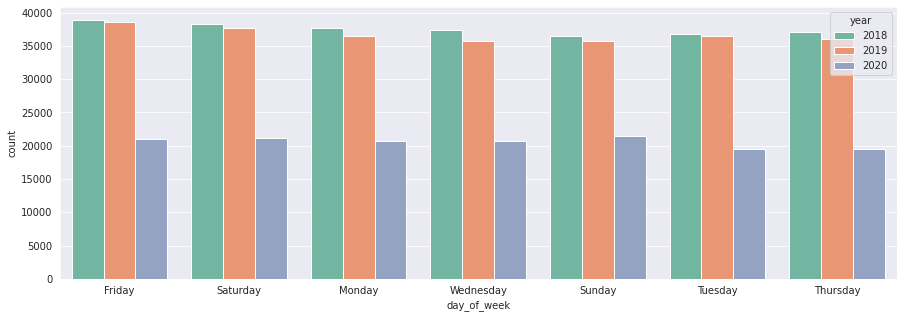

In [ ]:
plt.figure(figsize=(15,5))
zone_plot = sns.countplot(data=crimes_data,x='day_of_week',hue='year',order=crimes_data.day_of_week.value_counts().index,palette='Set2')

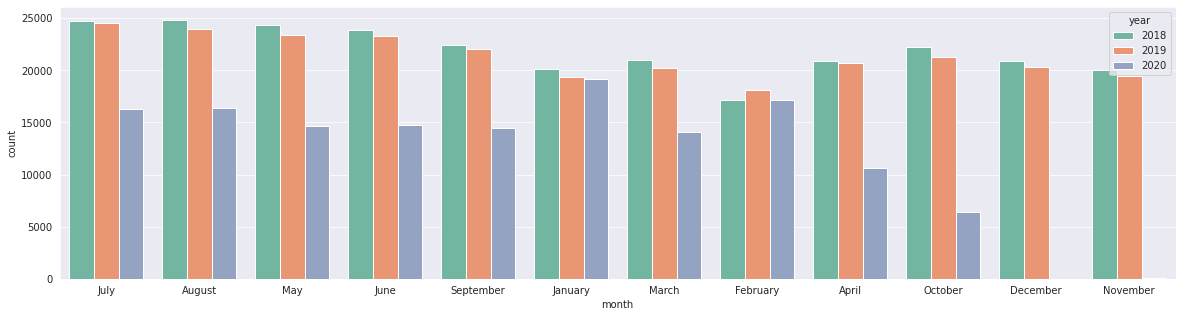

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.countplot(data=crimes_data,x='month',hue='year',order=crimes_data.month.value_counts().index,palette='Set2')

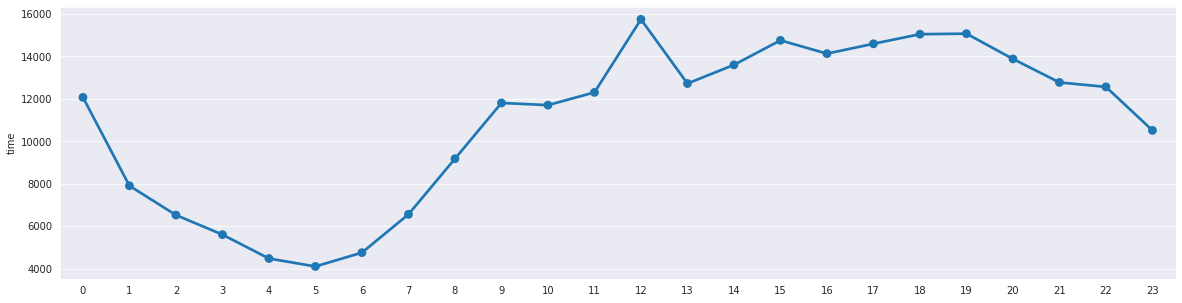

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2018,x=crimes_data_2018.time.value_counts().index,y=crimes_data_2018.time.value_counts())

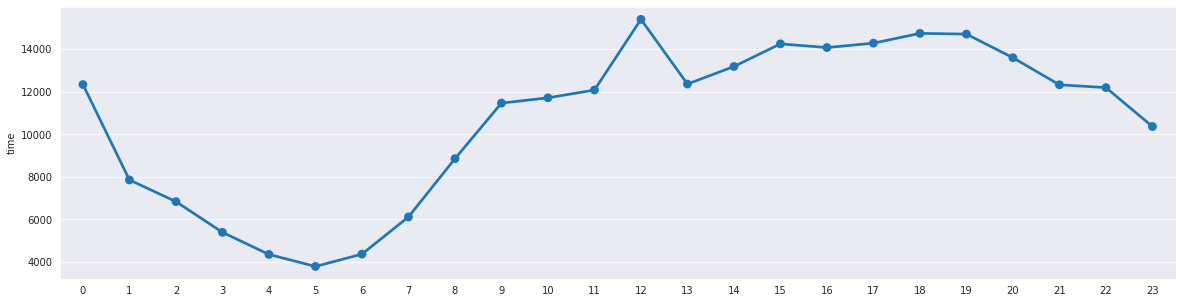

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2019,x=crimes_data_2019.time.value_counts().index,y=crimes_data_2019.time.value_counts())

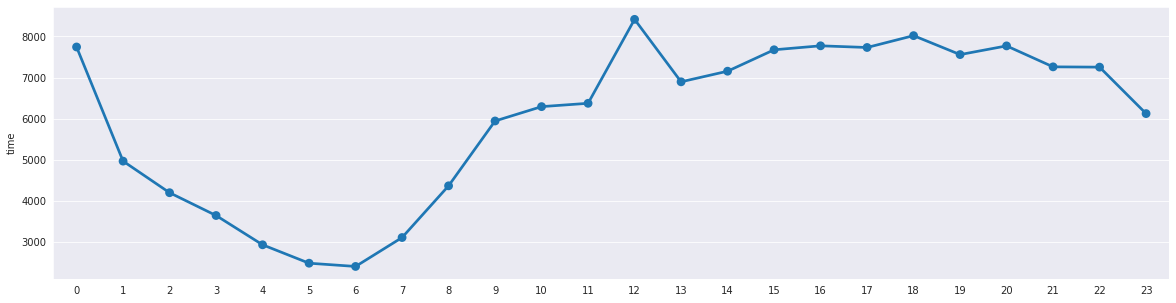

In [ ]:
plt.figure(figsize=(20,5))
zone_plot = sns.pointplot(data=crimes_data_2020,x=crimes_data_2020.time.value_counts().index,y=crimes_data_2020.time.value_counts())

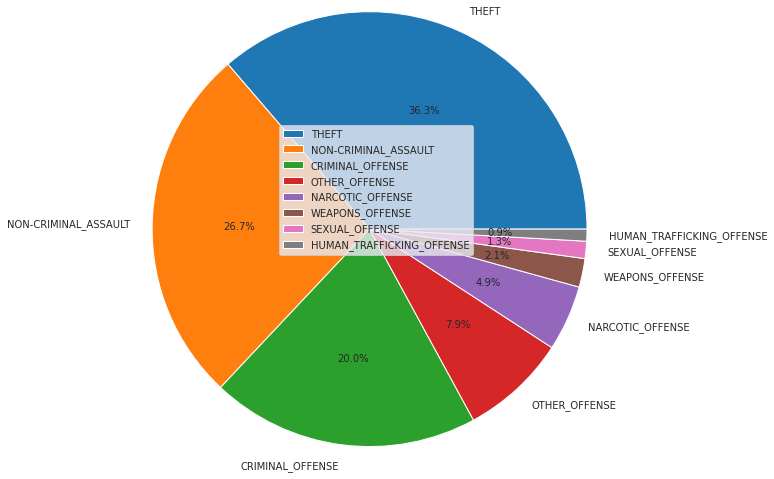

In [ ]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.primary_type_grouped.value_counts(),labels=crimes_data_2018.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

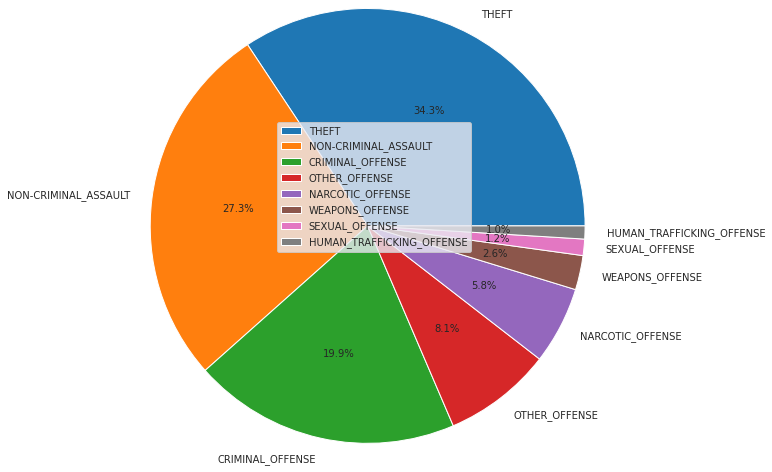

In [ ]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2019.primary_type_grouped.value_counts(),labels=crimes_data_2019.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

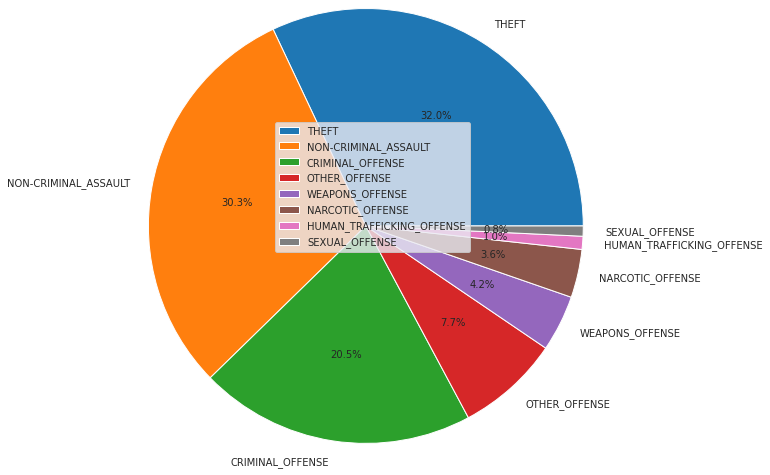

In [ ]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2020.primary_type_grouped.value_counts(),labels=crimes_data_2020.primary_type_grouped.value_counts().index,autopct='%1.1f%%',radius=2.5)
plt.legend(loc = 'best')

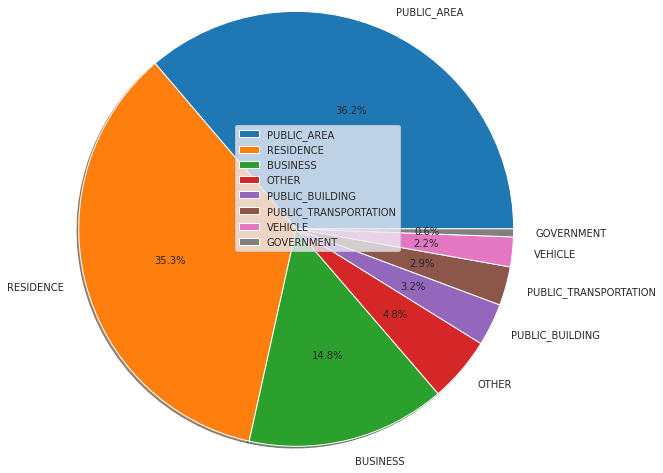

In [ ]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2018.loc_grouped.value_counts(),labels=crimes_data_2018.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

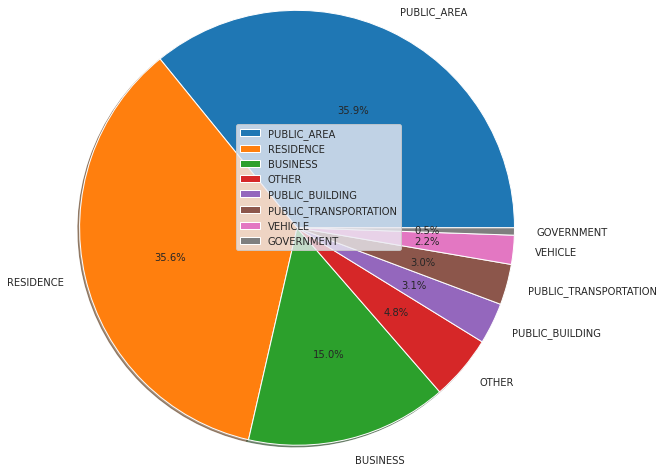

In [ ]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2019.loc_grouped.value_counts(),labels=crimes_data_2019
                                       .loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

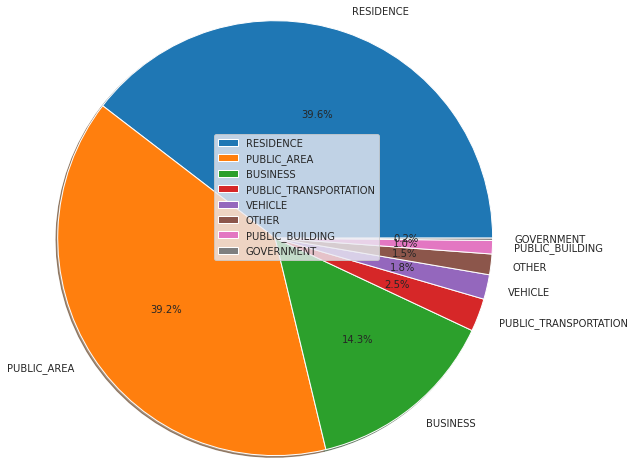

In [ ]:
crimes_data_primary_type_pie = plt.pie(crimes_data_2020.loc_grouped.value_counts(),labels=crimes_data_2020.loc_grouped.value_counts().index,autopct='%1.1f%%',shadow=True,radius=2.5)
plt.legend(loc = 'best')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

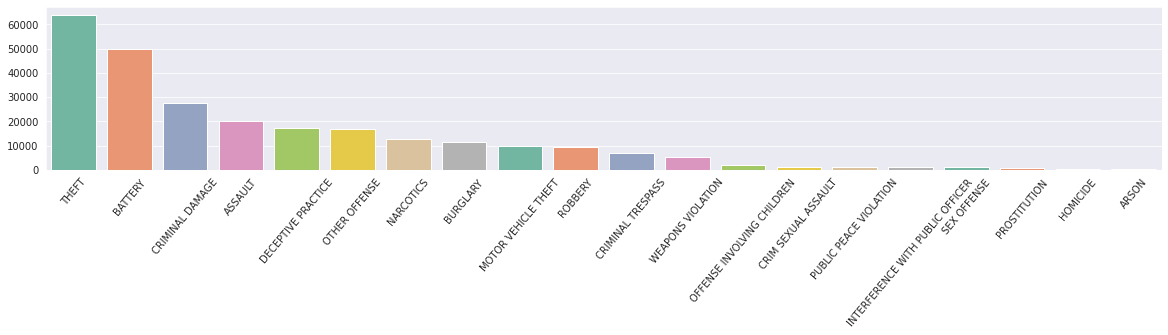

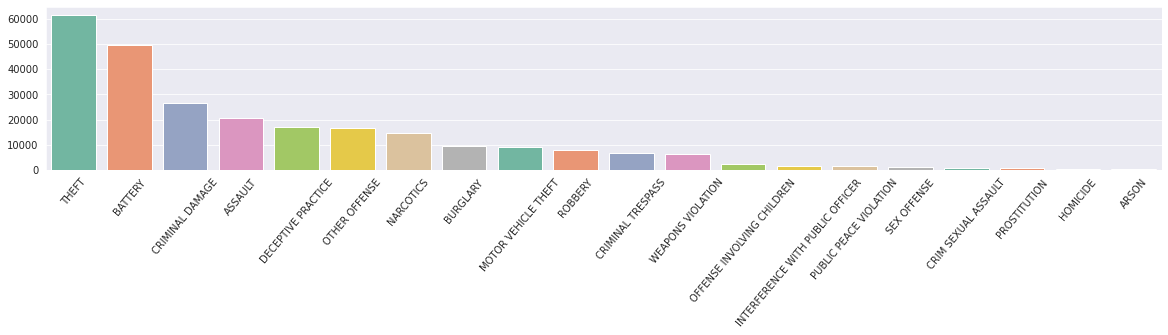

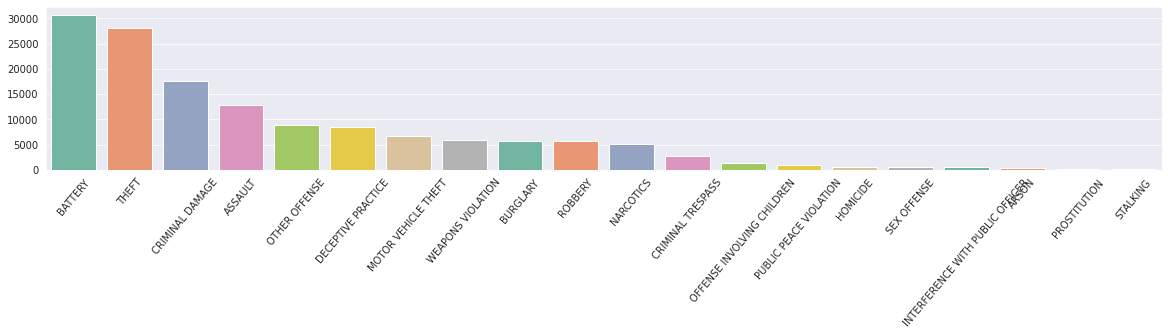

In [ ]:
plt.figure(figsize=(20,3))
primary_type_plot_2018 = sns.barplot(data=crimes_data_2018,x=crimes_data_2018.primary_type.value_counts()[0:20].index,y=crimes_data_2018.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=50)
plt.figure(figsize=(20,3))
primary_type_plot_2019 = sns.barplot(data=crimes_data_2019,x=crimes_data_2019.primary_type.value_counts()[0:20].index,y=crimes_data_2019.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=50)
plt.figure(figsize=(20,3))
primary_type_plot_2020 = sns.barplot(data=crimes_data_2020,x=crimes_data_2020.primary_type.value_counts()[0:20].index,y=crimes_data_2020.primary_type.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=50)

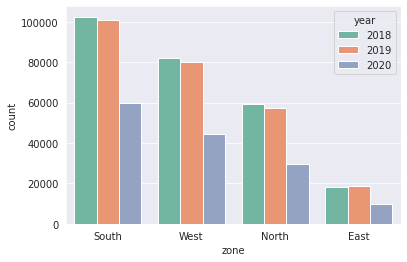

In [ ]:
zone_plot = sns.countplot(data=crimes_data,x='zone',hue='year',order=crimes_data.zone.value_counts().index,palette='Set2')

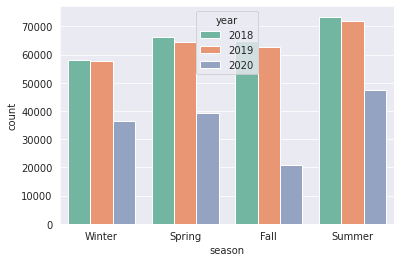

In [ ]:
zone_plot = sns.countplot(data=crimes_data,x='season',hue='year',palette='Set2')

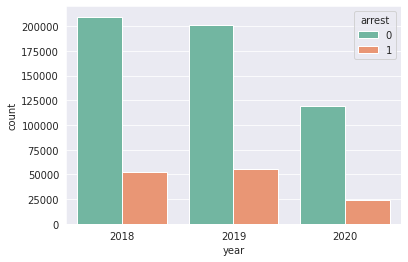

In [ ]:
arrest_plot = sns.countplot(data=crimes_data,x='year',hue='arrest',palette='Set2')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

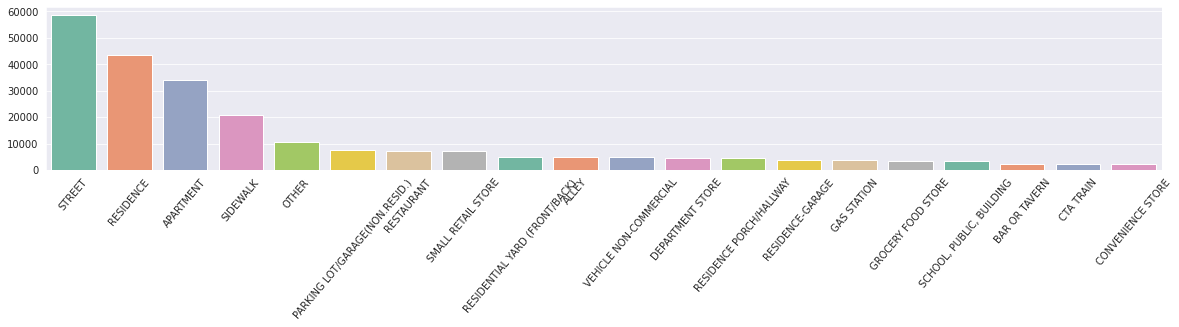

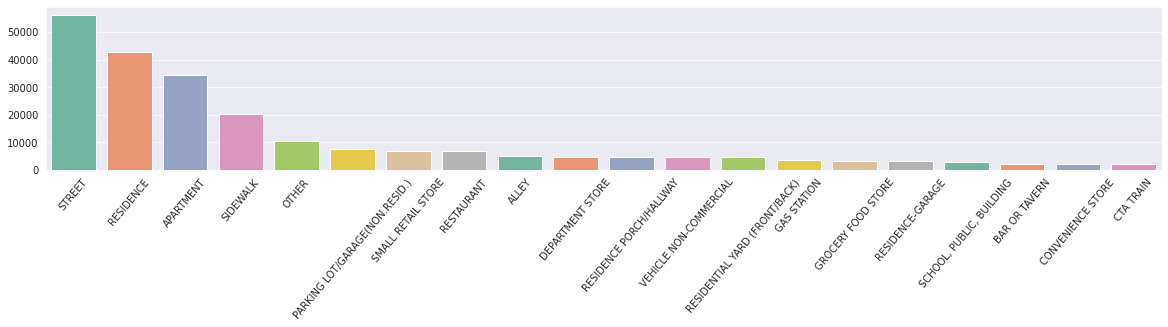

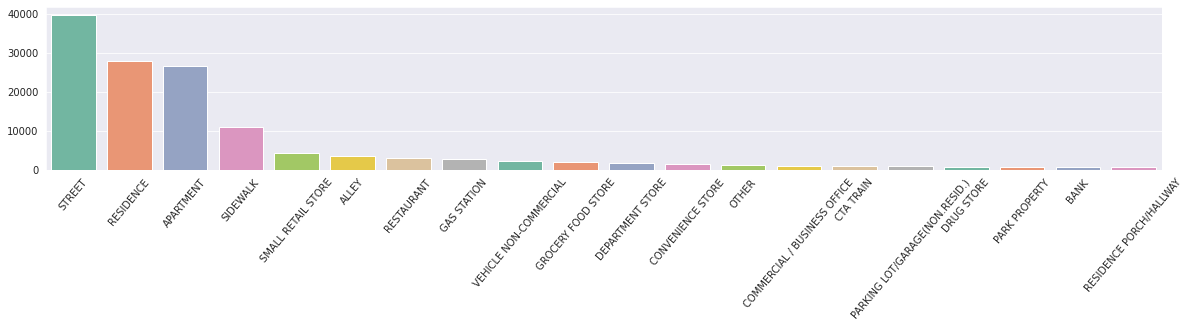

In [ ]:
plt.figure(figsize=(20,3))
location_description_plot_2018 = sns.barplot(data=crimes_data_2018,x=crimes_data_2018.location_description.value_counts()[0:20].index,y=crimes_data_2018.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=50)
plt.figure(figsize=(20,3))
location_description_plot_2019 = sns.barplot(data=crimes_data_2019,x=crimes_data_2019.location_description.value_counts()[0:20].index,y=crimes_data_2019.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=50)
plt.figure(figsize=(20,3))
location_description_plot_2020 = sns.barplot(data=crimes_data_2020,x=crimes_data_2020.location_description.value_counts()[0:20].index,y=crimes_data_2020.location_description.value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=50)

Text(0.5, 1.0, 'Crimes by Type of crime')

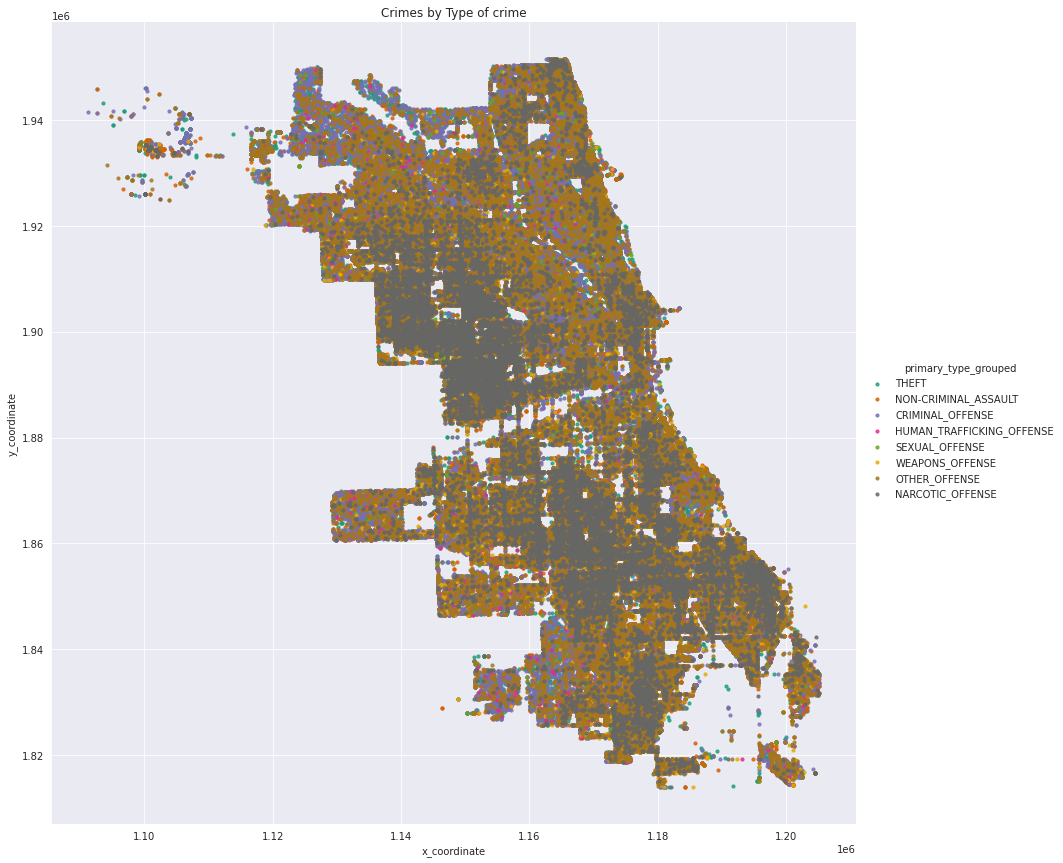

In [ ]:
new_crimes_data = crimes_data.loc[(crimes_data['x_coordinate']!=0)]
sns.lmplot('x_coordinate', 
           'y_coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="primary_type_grouped",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")

# **6. Preparing the data**

In [ ]:
crimes_data.year = pd.Categorical(crimes_data.year)
crimes_data.time = pd.Categorical(crimes_data.time)
crimes_data.domestic = pd.Categorical(crimes_data.domestic)
crimes_data.arrest = pd.Categorical(crimes_data.arrest)
crimes_data.beat = pd.Categorical(crimes_data.beat)
crimes_data.district = pd.Categorical(crimes_data.district)
crimes_data.ward = pd.Categorical(crimes_data.ward)
crimes_data.community_area = pd.Categorical(crimes_data.community_area)

In [ ]:
crimes_data_prediction = crimes_data.drop(['date','block','iucr','primary_type','description','location_description','fbi_code','updated_on','x_coordinate','y_coordinate'],axis=1)

In [ ]:
crimes_data_prediction.head()

,arrest,domestic,beat,district,ward,community_area,year,latitude,longitude,day_of_week,month,time,primary_type_grouped,zone,season,loc_grouped
0,0,0,2533,25,36.0,19,2018,41.914667,-87.746015,Monday,February,14,THEFT,North,Winter,BUSINESS
1,0,0,112,1,42.0,32,2018,41.880802,-87.625516,Thursday,January,20,THEFT,East,Winter,BUSINESS
2,0,0,513,5,9.0,50,2018,41.699538,-87.607345,Wednesday,May,21,NON-CRIMINAL_ASSAULT,South,Spring,PUBLIC_AREA
3,0,0,1932,19,32.0,7,2018,41.931406,-87.665948,Thursday,December,23,THEFT,North,Winter,PUBLIC_AREA
4,1,0,835,8,18.0,70,2018,41.745309,-87.697388,Friday,April,14,THEFT,South,Spring,RESIDENCE


In [ ]:
crimes_data_prediction = pd.get_dummies(crimes_data_prediction,drop_first=True)
crimes_data_prediction.head()

,latitude,longitude,arrest_1,domestic_1,beat_112,beat_113,beat_114,beat_121,beat_122,beat_123,beat_124,beat_131,beat_132,beat_133,beat_211,beat_212,beat_213,beat_214,beat_215,beat_221,beat_222,beat_223,beat_224,beat_225,beat_231,beat_232,beat_233,beat_234,beat_235,beat_311,beat_312,beat_313,beat_314,beat_321,beat_322,beat_323,beat_324,beat_331,beat_332,beat_333,...,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,primary_type_grouped_HUMAN_TRAFFICKING_OFFENSE,primary_type_grouped_NARCOTIC_OFFENSE,primary_type_grouped_NON-CRIMINAL_ASSAULT,primary_type_grouped_OTHER_OFFENSE,primary_type_grouped_SEXUAL_OFFENSE,primary_type_grouped_THEFT,primary_type_grouped_WEAPONS_OFFENSE,zone_North,zone_South,zone_West,season_Spring,season_Summer,season_Winter,loc_grouped_GOVERNMENT,loc_grouped_OTHER,loc_grouped_PUBLIC_AREA,loc_grouped_PUBLIC_BUILDING,loc_grouped_PUBLIC_TRANSPORTATION,loc_grouped_RESIDENCE,loc_grouped_VEHICLE
0,41.914667,-87.746015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,41.880802,-87.625516,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,41.699538,-87.607345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,41.931406,-87.665948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,41.745309,-87.697388,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0


# **7. Algorithm analysis**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(crimes_data_prediction.drop(['arrest_1'],axis=1),crimes_data_prediction['arrest_1'], test_size=0.25, random_state=42)

#      **i. Gaussian Naive Bayes**

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[61076 71304]
 [ 7787 25624]]


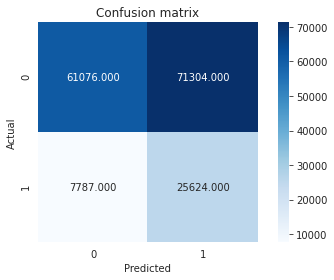

In [ ]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.522947566514467
Error =  0.47705243348553295
Precision =  0.26436117530538134
Recall =  0.7669330460028134
F-1 Score =  0.39319006590506295
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.46      0.61    132380
           1       0.26      0.77      0.39     33411

    accuracy                           0.52    165791
   macro avg       0.58      0.61      0.50    165791
weighted avg       0.76      0.52      0.56    165791



# **ii. Decision Tree**

In [ ]:
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[115885  16495]
 [ 15145  18266]]


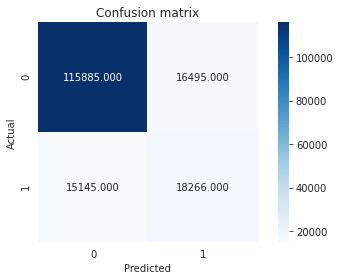

In [ ]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.80915731251998
Error =  0.19084268748001998
Precision =  0.5254739506918673
Recall =  0.5467061746131514
F-1 Score =  0.5358798333626709
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88    132380
           1       0.53      0.55      0.54     33411

    accuracy                           0.81    165791
   macro avg       0.70      0.71      0.71    165791
weighted avg       0.81      0.81      0.81    165791



# **iii. Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators = 10,criterion='entropy',random_state=42)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[129447   2933]
 [ 18923  14488]]


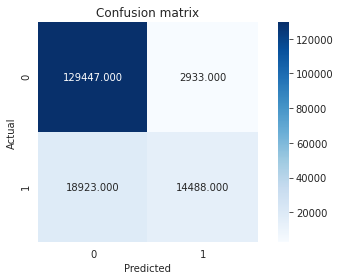

In [ ]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8681713723905399
Error =  0.13182862760946013
Precision =  0.8316399747431261
Recall =  0.43362964293196854
F-1 Score =  0.5700346238589865
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92    132380
           1       0.83      0.43      0.57     33411

    accuracy                           0.87    165791
   macro avg       0.85      0.71      0.75    165791
weighted avg       0.86      0.87      0.85    165791



# **iv. Logistic Regression**

In [ ]:
classifier = LogisticRegression(random_state=42)

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[130336   2044]
 [ 21643  11768]]


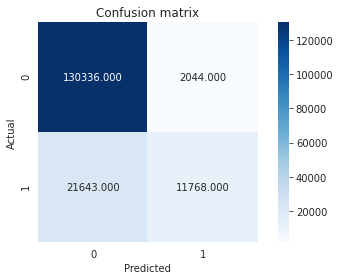

In [ ]:
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [ ]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Error = ',1 - metrics.accuracy_score(y_test, y_pred))
print('Precision = ',metrics.precision_score(y_test, y_pred,))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('F-1 Score = ',metrics.f1_score(y_test, y_pred))
print('Classification Report\n',metrics.classification_report(y_test, y_pred))

Accuracy =  0.8571273470815666
Error =  0.14287265291843343
Precision =  0.8520127425427165
Recall =  0.352219328963515
F-1 Score =  0.49840120280371847
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.98      0.92    132380
           1       0.85      0.35      0.50     33411

    accuracy                           0.86    165791
   macro avg       0.85      0.67      0.71    165791
weighted avg       0.86      0.86      0.83    165791



# **8. Hypertuning and final accuracy**

In [ ]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
print(all_accuracies.max())

0.8697448579528319
